# Image Preparation For Convolutional Neural Networks With TensorFlow's Keras API



## 1. Image Preparation For Convolutional Neural Networks With TensorFlow's Keras API


### 1.1 Obtain The Data

The first thing we need to do is get and prepare the data for which we’ll be training the CNN.

The data set we’ll use is a random subset of the data set from the Kaggle Dogs Versus Cats competition. You can download the data [here](https://www.kaggle.com/c/dogs-vs-cats/data)



### 1.2 Organize The Data

* We now need to organize the directory structure on disk to hold the data set. We'll manually do some parts of the organization, and programmatically do the rest.

* Copy the downloaded dogs-vs-cats.zip file, and paste it into whichever directory you’d like to work from. Relative to the Jupyter notebook we'll be working in,For this code we are placing dogs-vs-cats.zip within a directory called data.

* Now, extract dogs-vs-cats.zip, and then extract train.zip from within. 

* Next, select all of the image files from within the train directory and move them into the base dogs-vs-cats directory. Lastly, delete the empty train directory.

* That's it for the manual labor! At this point, we have 25,000 labeled images of cats and dogs in our dogs-vs-cats directory. Note, the labels are included in the file names. Now, we'll do the remainder of the data organization programmatically.

### 1.3 Import Modules 

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten , BatchNormalization , Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# Organize data into train, valid, test dirs
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

The full data set contains 25,000 images, half of which are cats, and half are dogs. We don't need nearly this much data for the tasks we'll be carrying out, so we're going to work with a subset. The remainder of the script moves 1000 samples into the training set, 200 samples into the validation set, and 100 samples into the test set. Each set has have an equal amount of cats and dogs.


### 1.4 Process The Data


In [3]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'


we use Keras' ImageDataGenerator class to create batches of data from the train, valid, and test directories.

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


* ImageDataGenerator.flow_from_directory() creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.

* Notice, to ImageDataGenerator for each of the data sets, we specify preprocessing_function=tf.keras.applications.vgg16.preprocess_input. For now, just understand this does an additional processing step on the images. We'll cover what exactly this processing is when we work with the pre-trained VGG16 CNN in a future episode.


* To flow_from_directory(), we first specify the path for the data. We then specify the target_size of the images, which will resize all images to the specified size. The size we specify here is determined by the input size that the neural network expects.

* The classes parameter expects a list that contains the underlying class names, and lastly, we specify the batch_size.

* We also specify shuffle=False only for test_batches. That's because, later when we plot the evaluation results from the model to a confusion matrix, we'll need to able to access the unshuffled labels for the test set. By default, the data sets are shuffled.

* Note, in the case where you do not know the labels for the test data, you will need to modify the test_batches variable. Specifically, the change will be to set the parameters classes = None and class_mode = None in flow_from_directory().

### 1. 5 Visualize The Data

In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

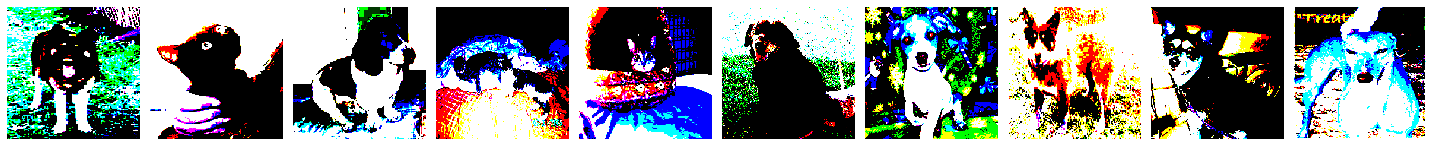

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
plotImages(imgs)
print(labels)

~This is what the first processed random batch from the training set looks like. Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets, which we'll talk about in an upcoming episode. Don't worry about it for now, just know that the RGB pixel data has been processed in such a way that the image data now looks like this before being passed to the network.

Note that dogs are represented with the one-hot encoding of [0,1], and cats are represented by [1,0].

## 2. Build A Simple CNN


In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

* The first layer in the model is a 2-dimensional convolutional layer. This layer will have 32 output filters each with a kernel size of 3x3, and we’ll use the relu activation function.

**Note**- that the choice for the number of output filters specified is arbitrary, and the chosen kernel size of 3x3 is generally a very common size to use. You can experiment by choosing different values for these parameters.

* We enable zero-padding by specifying padding = 'same'.

* On the first layer only, we also specify the input_shape, which is the shape of our data. Our images are 224 pixels high and 224 pixels wide and have 3 color channels: RGB. This gives us an input_shape of (224,224,3).

* We then add a max pooling layer to pool and reduce the dimensionality of the data.

* We follow this by adding another convolutional layer with the exact specs as the earlier one, except for this second Conv2D layer has 64 filters. The choice of 64 here is again arbitrary, but the general choice of having more filters in later layers than in earlier ones is common. This layer is again followed by the same type of MaxPool2D layer.

* We then Flatten the output from the convolutional layer and pass it to a Dense layer. This Dense layer is the output layer of the network, and so it has 2 nodes, one for cat and one for dog. We’ll use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of cat and dog.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

### 2.1 Compile The Model

 we compile the model using the Adam optimizer with a learning rate of 0.0001, a loss of categorical_cross_entropy, and we’ll look at accuracy as our performance metric

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Train A Simple CNN


* We need to specify steps_per_epoch to indicate how many batches of samples from our training set should be passed to the model before declaring one epoch complete. Since we have 1000 samples in our training set, and our batch size is 10, then we set steps_per_epoch to be 100, since 100 batches of 10 samples each will encompass our entire training set.

* We're able to use len(train_batches) as a more general way to specify this value, as the length of train_batches is equal to 100 since it is made up of 100 batches of 10 samples. Similarly, we specify validation_steps in the same fashion but with using valid_batches.

* We’re specifying 10 as the number of epochs we’d like to run, and setting the verbose parameter to 2, which just specifies the verbosity of the log output printed to the console during training.


In [11]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)


Epoch 1/10
100/100 - 37s - loss: 20.2050 - accuracy: 0.5570 - val_loss: 5.8185 - val_accuracy: 0.6350
Epoch 2/10
100/100 - 46s - loss: 2.0265 - accuracy: 0.7800 - val_loss: 3.4767 - val_accuracy: 0.6400
Epoch 3/10
100/100 - 50s - loss: 0.7148 - accuracy: 0.8640 - val_loss: 4.0980 - val_accuracy: 0.6500
Epoch 4/10
100/100 - 51s - loss: 0.4047 - accuracy: 0.9150 - val_loss: 3.0101 - val_accuracy: 0.6550
Epoch 5/10
100/100 - 37s - loss: 0.0441 - accuracy: 0.9860 - val_loss: 3.3307 - val_accuracy: 0.6250
Epoch 6/10
100/100 - 38s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 3.0903 - val_accuracy: 0.6500
Epoch 7/10
100/100 - 38s - loss: 8.5860e-04 - accuracy: 1.0000 - val_loss: 3.0808 - val_accuracy: 0.6450
Epoch 8/10
100/100 - 37s - loss: 5.8612e-04 - accuracy: 1.0000 - val_loss: 3.0664 - val_accuracy: 0.6450
Epoch 9/10
100/100 - 39s - loss: 4.7730e-04 - accuracy: 1.0000 - val_loss: 3.0647 - val_accuracy: 0.6500
Epoch 10/10
100/100 - 37s - loss: 4.0786e-04 - accuracy: 1.0000 - val_loss: 3.

## 3. Make Predictions With A Keras CNN Image Classifier

### 3.1 Preparing The Test Data

Run next(test_batches) to extract a batch of images and their corresponding labels from the test set.

In [12]:
test_imgs, test_labels = next(test_batches)

Using Keras ImageDataGenerator.flow_from_directory() to generate batches of data from the test set that resides on disk.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

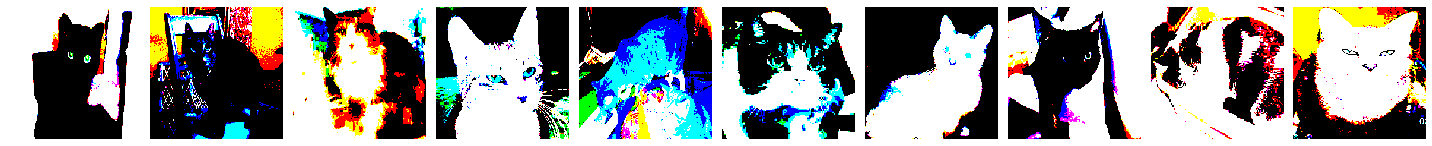

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
plotImages(test_imgs)
print(test_labels)

We chose to not shuffle our test set when we originally created it, the first half of the test data is all cats, and the second half is all dogs. Also, recall that the color data appears skewed due to the VGG16 preprocessing we specified when we created the data sets.

### 3.2 Predicting On The Test Data

Call model.predict() to have the model predict on the test set.

In [14]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

### 3.1 Plotting Predictions With A Confusion Matrix

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[33 17]
 [17 33]]


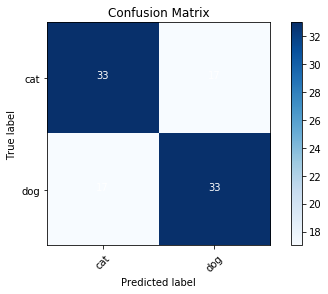

In [24]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')